Targeting treatment for heart disease patients

In [10]:
# Load the data
heart_disease <- read.csv("/content/drive/MyDrive/Portfolio/Clustering/heart_disease_patients.csv")

# Print the first ten rows
head(heart_disease)

# Evidence that the data should be scaled?
summary(heart_disease)

# Remove id
heart_disease <- heart_disease[ , !(names(heart_disease) %in% c('id'))]

# Scaling data and saving as a data frame
scaled <- scale(heart_disease)

# What do the data look like now?
summary(scaled)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,63,1,1,145,233,1,2,150,0,2.3,3
2,2,67,1,4,160,286,0,2,108,1,1.5,2
3,3,67,1,4,120,229,0,2,129,1,2.6,2
4,4,37,1,3,130,250,0,0,187,0,3.5,3
5,5,41,0,2,130,204,0,2,172,0,1.4,1
6,6,56,1,2,120,236,0,0,178,0,0.8,1


       id             age             sex               cp       
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000  
 Median :152.0   Median :56.00   Median :1.0000   Median :3.000  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :3.158  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :4.000  
    trestbps          chol            fbs            restecg      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.0000   Max.   :2.0000  
    thalach          exang           oldpeak         slope      
 Min

      age               sex                cp             trestbps       
 Min.   :-2.8145   Min.   :-1.4549   Min.   :-2.2481   Min.   :-2.14149  
 1st Qu.:-0.7124   1st Qu.:-1.4549   1st Qu.:-0.1650   1st Qu.:-0.66420  
 Median : 0.1727   Median : 0.6851   Median :-0.1650   Median :-0.09601  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7259   3rd Qu.: 0.6851   3rd Qu.: 0.8765   3rd Qu.: 0.47218  
 Max.   : 2.4961   Max.   : 0.6851   Max.   : 0.8765   Max.   : 3.88132  
      chol              fbs             restecg             thalach       
 Min.   :-2.3310   Min.   :-0.4169   Min.   :-0.995103   Min.   :-3.4364  
 1st Qu.:-0.6894   1st Qu.:-0.4169   1st Qu.:-0.995103   1st Qu.:-0.7041  
 Median :-0.1100   Median :-0.4169   Median : 0.009951   Median : 0.1483  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.: 0.5467   3rd Qu.:-0.4169   3rd Qu.: 1.015005   3rd Qu.: 0.7166  
 Max.   : 6.1283   Max.   : 2.39

Grouping Patients

In [11]:
# Set the seed so that results are reproducible
seed_val  <- 10
set.seed(seed_val)

# Select a number of clusters
k = 5

# Run the k-means algorithm
first_clust = kmeans(scaled, centers = k, nstart = 1)

# How many patients are in each cluster?
cluster_sizes <- first_clust$size
print(cluster_sizes)

[1] 66 43 88 61 45


K-Means clustering

In [12]:
# Set the seed
seed_val <- 38
set.seed(seed_val)

# Select a number of clusters and run the k-means algorithm
second_clust = kmeans(scaled, centers = 5, nstart = 1)

# How many patients are in each cluster?
cluster_sizes <- second_clust$size
print(cluster_sizes)

[1] 65 43 61 46 88


Plots of k-means clustering

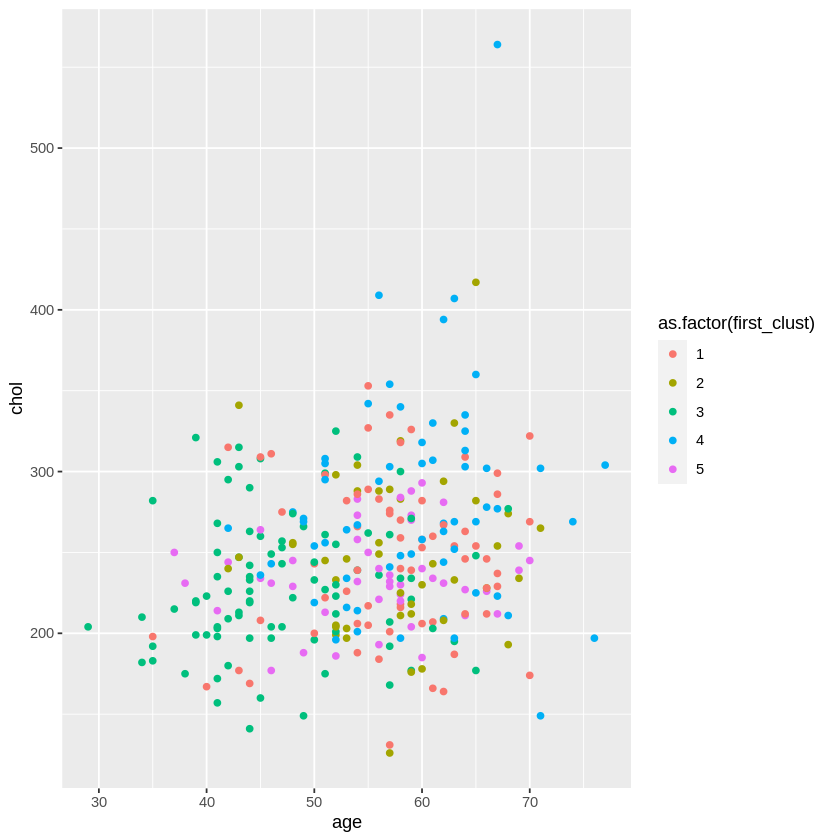

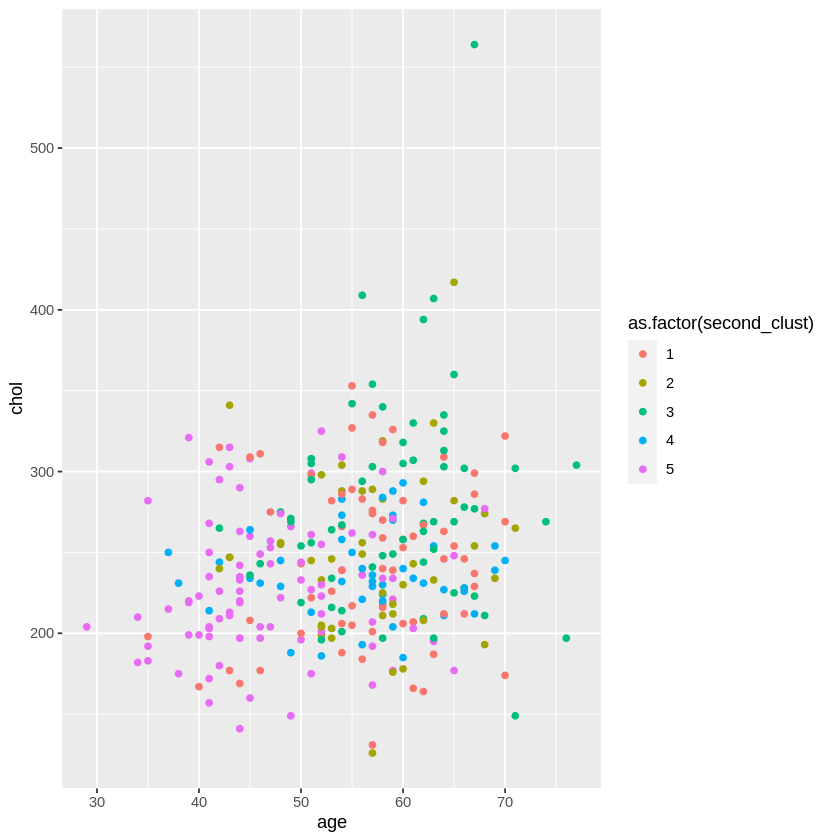

In [13]:
# Add cluster assignments to the data
heart_disease["first_clust"] <- first_clust$cluster
heart_disease["second_clust"] <- second_clust$cluster

# Load ggplot2
library(ggplot2)

# Create and print the plot of age and chol for the first clustering algorithm
plot_one <- ggplot(heart_disease, aes(x=age, y=chol, color=as.factor(first_clust))) +
  geom_point()
plot_one

# Create and print the plot of age and chol for the second clustering algorithm
plot_two <- ggplot(heart_disease, aes(x=age, y=chol, color=as.factor(second_clust))) +
  geom_point()
plot_two

Hierarchical clustering with complete linkage

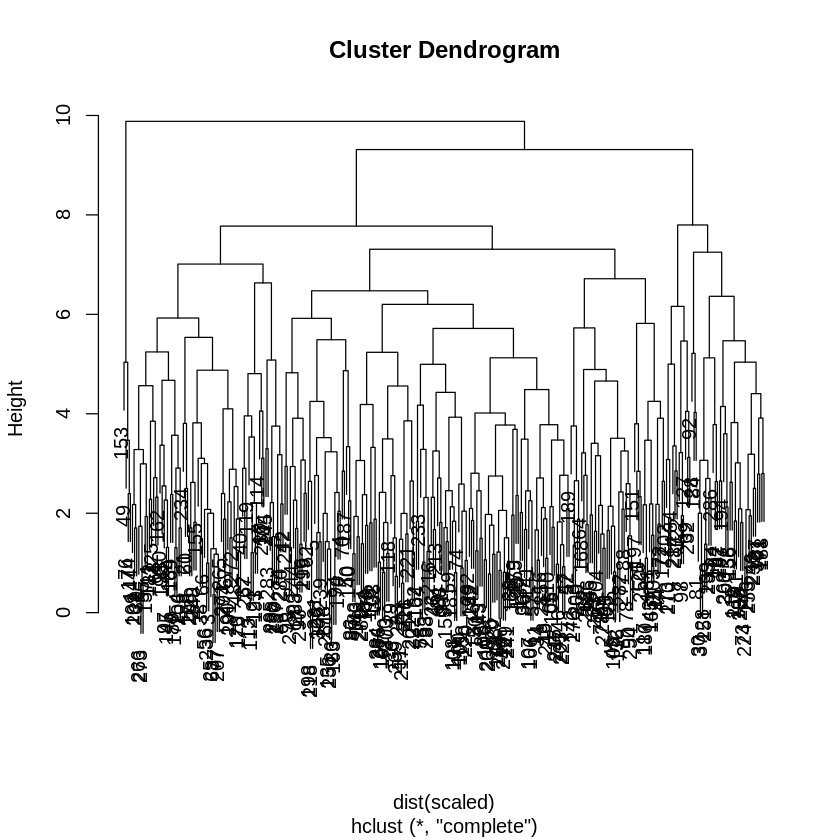

In [14]:
# Execute hierarchical clustering with complete linkage
hier_clust_1 <- hclust(dist(scaled), method = 'complete')

# Print the dendrogram
plot(hier_clust_1)

# Get cluster assignments based on number of selected clusters
hc_1_assign <- cutree(hier_clust_1, k = 5)

Hierarchical clustering with single linkage

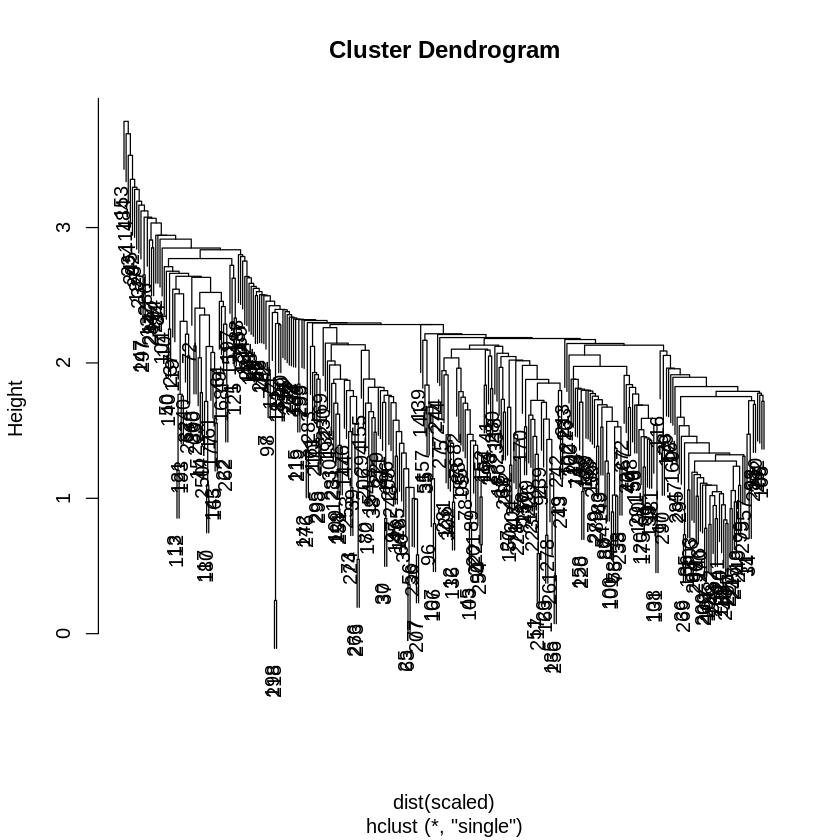

In [15]:
# Execute hierarchical clustering with single linkage
hier_clust_2 <- hclust(dist(scaled), method = 'single')

# Print the dendrogram
plot(hier_clust_2)

# Get cluster assignments based on number of selected clusters
hc_2_assign <- cutree(hier_clust_2, k = 5)

Comparing clustering results

In [16]:
# Add assignment of chosen hierarchical linkage
heart_disease$hc_clust <- hc_1_assign  # or hc_2_assign

# Remove the sex, first_clust, and second_clust variables
hd_simple <- heart_disease[, !(names(heart_disease) %in% c("sex", "first_clust", "second_clust"))]

# Get the mean and standard deviation summary statistics
clust_summary <- do.call(data.frame, aggregate(. ~ hc_clust, data = hd_simple,
                                               FUN = function(x) c(avg = mean(x), sd = sd(x))))
clust_summary

hc_clust,age.avg,age.sd,cp.avg,cp.sd,trestbps.avg,trestbps.sd,chol.avg,chol.sd,fbs.avg,⋯,restecg.avg,restecg.sd,thalach.avg,thalach.sd,exang.avg,exang.sd,oldpeak.avg,oldpeak.sd,slope.avg,slope.sd
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,51.41667,8.540979,2.783333,0.9470625,129.1389,15.93800,239.8722,42.29228,0.1222222,⋯,0.8444444,0.9905826,161.5722,15.779214,0.07777778,0.2685686,0.555000,0.7847196,1.388889,0.5730336
2,58.11111,7.754246,3.763889,0.6165112,130.0417,13.90657,253.2222,49.74476,0.1805556,⋯,1.4027778,0.9140488,135.5417,17.991342,0.81944444,0.3873488,1.451389,1.0804268,1.750000,0.5240686
3,61.00000,3.908034,3.916667,0.2886751,168.5000,17.45904,284.9167,53.00336,0.3333333,⋯,1.2500000,0.9653073,147.7500,13.157266,0.75000000,0.4522670,2.316667,1.4708274,2.166667,0.5773503
4,59.00000,9.203580,3.571429,0.8501112,134.7714,18.64070,233.8571,49.67136,0.1428571,⋯,0.6857143,0.9321521,116.8857,17.842071,0.48571429,0.5070926,2.240000,1.3856831,2.200000,0.4058397
5,64.75000,2.061553,3.250000,0.5000000,138.7500,18.42779,433.7500,89.93470,0.2500000,⋯,2.0000000,0.0000000,156.2500,3.774917,0.00000000,0.0000000,1.100000,0.3829708,1.500000,0.5773503


Visuzalizing the cluster contents

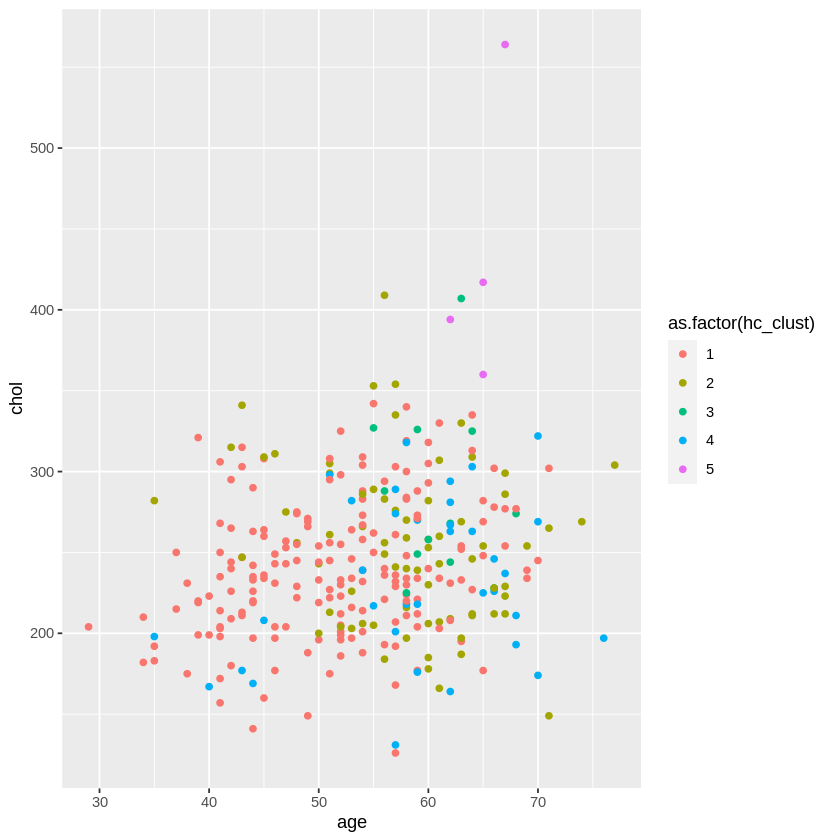

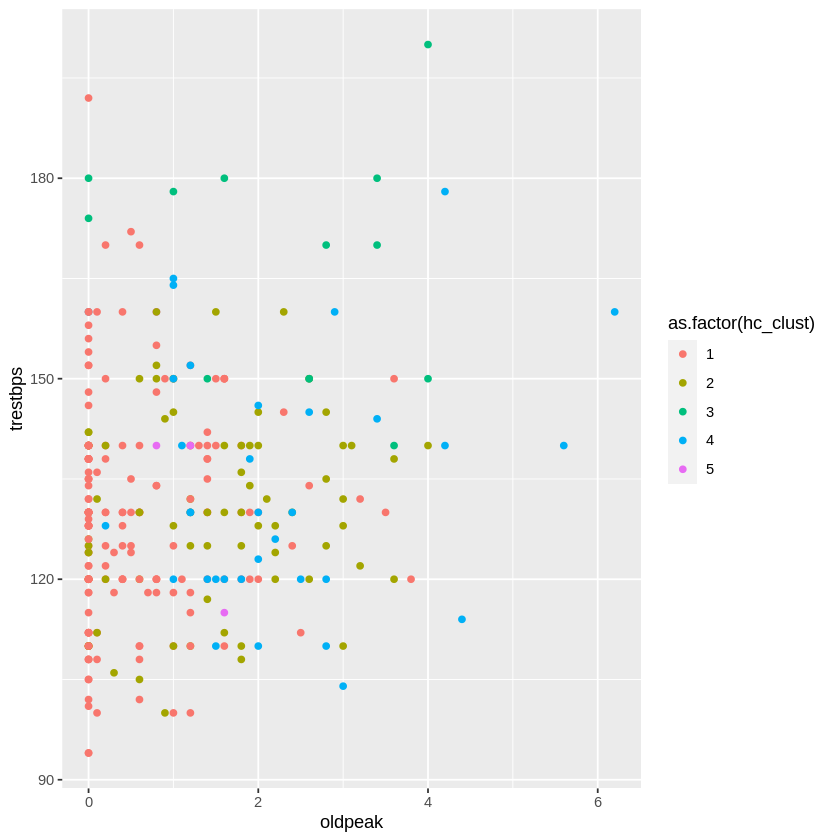

In [17]:
# Plot age and chol
plot_one <- ggplot(heart_disease, aes(x = age, y = chol,
                                      color = as.factor(hc_clust))) +
  geom_point()
plot_one

# Plot oldpeak and trestbps
plot_two <- ggplot(heart_disease, aes(x = oldpeak, y = trestbps,
                                      color = as.factor(hc_clust))) +
  geom_point()
plot_two